In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack

In [24]:
def scipyFourier(values):
    acc_fft = sp.fftpack.fft(np.array(values))
    acc_psd = np.abs(acc_fft) **2

    fftfreq = sp.fftpack.fftfreq(len(acc_psd), 1./12)

    i = fftfreq > 0
    '''
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    ax.plot(fftfreq[i], 10* np.log10(acc_psd[i]))
    ax.set_xlim(0,5)
    ax.set_xlabel("Frequency (1/year)")
    ax.set_ylabel("PSD (dB)")
    '''
    acc_fft_bis = acc_fft.copy()
    acc_fft_bis[np.abs(fftfreq) > 1.1 ] = 0

    acc_slow = np.real(sp.fftpack.ifft(acc_fft_bis))
    return acc_slow

def npFourier(values):
    # Calcular la transformada de Fourier
    fft = np.fft.fft(values)
    frecuencias = np.fft.fftfreq(len(values))
    #print(frecuencias)

    # Calcular el espectro de amplitud
    espectro_amplitud = np.abs(fft)
    #fase = np.angle(fft);     # New
    #print(espectro_amplitud)

    # Obtener el índice de las frecuencias principales
    indices_principales = np.argsort(espectro_amplitud)[::-1]
    #print(indices_principales)

    # Filtrar las frecuencias principales 
    num_frecuencias_a_considerar = int(len(values) * 0.12)  # considerando el 10% de las frecuencias
    fft_filtrado = np.zeros_like(fft)
    fft_filtrado[indices_principales[:num_frecuencias_a_considerar]] = fft[indices_principales[:num_frecuencias_a_considerar]]

    # Calcular la transformada inversa de Fourier
    serie_suavizada = np.fft.ifft(fft_filtrado).real
    return serie_suavizada

In [21]:
#Ej 1
df = pd.read_excel("s9_inegi_acc.xlsx")
df_interest = df.loc[:,["cve_entidad", "id_indicador", '2017/m01', '2017/m02', '2017/m03', '2017/m04', '2017/m05', '2017/m06', '2017/m07', '2017/m08', '2017/m09', '2017/m10', '2017/m11', '2017/m12', '2018/m01', '2018/m02', '2018/m03', '2018/m04', '2018/m05', '2018/m06', '2018/m07', '2018/m08', '2018/m09', '2018/m10', '2018/m11', '2018/m12', '2019/m01', '2019/m02', '2019/m03', '2019/m04', '2019/m05', '2019/m06', '2019/m07', '2019/m08', '2019/m09', '2019/m10', '2019/m11', '2019/m12', '2020/m01', '2020/m02', '2020/m03', '2020/m04', '2020/m05', '2020/m06', '2020/m07', '2020/m08', '2020/m09', '2020/m10', '2020/m11', '2020/m12', '2021/m01', '2021/m02', '2021/m03', '2021/m04', '2021/m05', '2021/m06', '2021/m07', '2021/m08', '2021/m09', '2021/m10', '2021/m11', '2021/m12']]
df_interest = df_interest.query("cve_entidad == 0 & id_indicador == 4000000001")
df_interest = df_interest.drop(columns=["cve_entidad", "id_indicador"])
df_melt = pd.melt(df_interest.reset_index(), id_vars=["index"], var_name="year")
df_melt = df_melt.drop(columns=["index"])

Text(0, 0.5, 'Accidents')

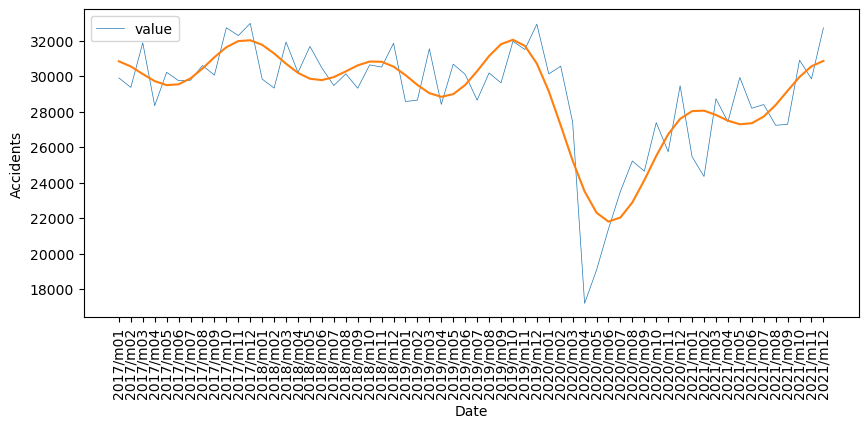

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
df_melt.plot(ax=ax, lw=.5)
ax.plot_date(df_melt.year, scipyFourier(df_melt.value), "-")
plt.xticks(rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Accidents")

Text(0, 0.5, 'Accidents')

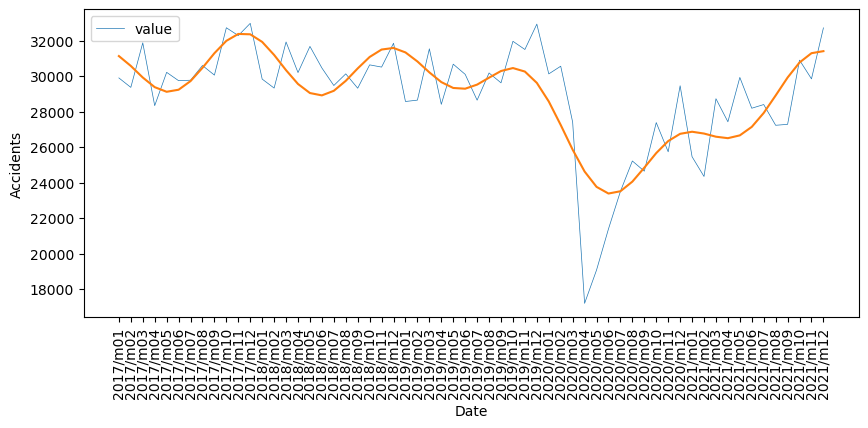

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
df_melt.plot(ax=ax, lw=.5)
ax.plot_date(df_melt.year, npFourier(df_melt.value), "-")
plt.xticks(rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Accidents")

In [28]:
#Ej 2
data = pd.read_csv("s10_inegi_IGPOSE.csv")
meses_a_numeros = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12,
}

# Reemplazar los nombres de los meses por los números
data['Mes'] = data['Mes'].replace(meses_a_numeros)
#print(data)

# serie de tiempo
data['Fecha'] = pd.to_datetime(data["Anio"].astype(str) + "-" + data["Mes"].astype(str))


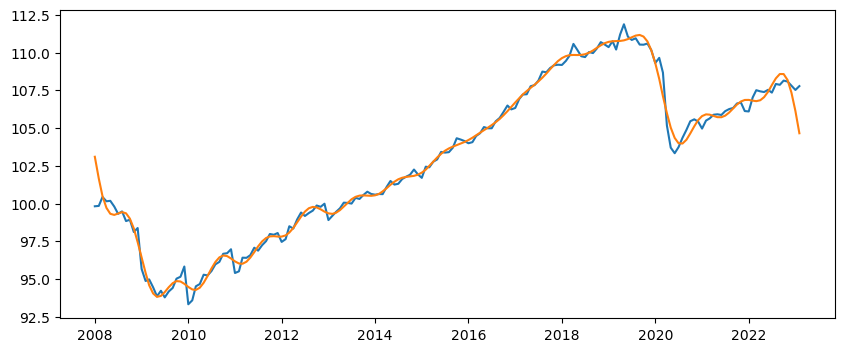

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(data.Fecha, data["IGPOSE"])
ax.plot_date(data.Fecha, scipyFourier(data["IGPOSE"]), "-")

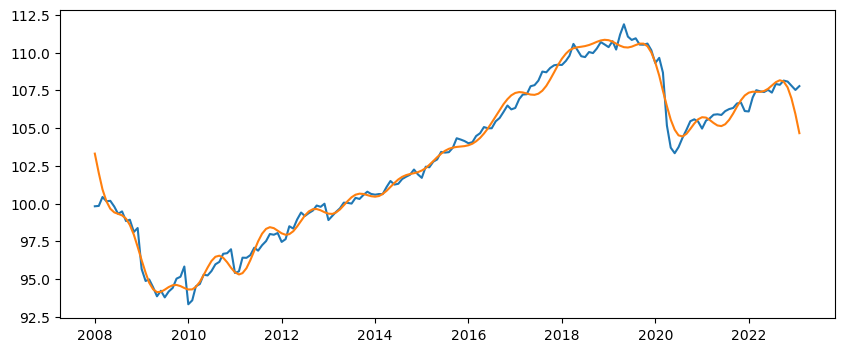

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot(data.Fecha, data["IGPOSE"])
ax.plot_date(data.Fecha, npFourier(data["IGPOSE"]), "-")